# フィッシャー判別分析
教師ありでクラスタを持つデータに対してフィッシャー判別分析を適用し，クラスカテゴリを考慮した射影直線を求める  
クラス間分散を最大に，クラス内分散を最小にするように一般固有値問題を解く

In [1]:
import numpy as np
from scipy.linalg import eig
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# データ生成
def generate_data(sample_size=100, random_state=0, pattern='two_cluster'):
    np.random.seed(random_state)
    if pattern not in ['two_cluster', 'three_cluster']:
        raise ValueError('Dataset pattern must be one of '
                         '[two_cluster, three_cluster].')
    x = np.random.normal(size=(sample_size, 2))
    if pattern == 'two_cluster':
        x[:sample_size // 2, 0] -= 4
        x[sample_size // 2:, 0] += 4
    else:
        x[:sample_size // 4, 0] -= 4
        x[sample_size // 4:sample_size // 2, 0] += 4
    y = np.ones(sample_size, dtype=np.int64)
    y[sample_size // 2:] = 2
    return x, y

In [3]:
# 実行関数
def fda(x, y):
    x = x - np.mean(x, axis=0)
    
    num1 = np.sum(y == 1)
    num2 = np.sum(y == 2)
    
    mu1 = np.mean(x[y == 1],axis=0)
    mu2 = np.mean(x[y == 2],axis=0)

    # s_b -> クラス間分散
    s_b = num1*np.dot(mu1[:,None],mu1[None]) + num2*np.dot(mu2[:,None],mu2[None])
    #print(s_b)
    
    # s_b -> クラス内分散
    s_w = np.zeros((2,2))
    for i in range(len(x)):
        _x = x[i] - mu1 if y[i] == 1 else x[i] - mu2
        s_w += np.dot(_x[:,None],_x[None])
    #print(s_w)
    
    w, v = eig(s_b, s_w)  # 一般固有値問題
    v = v[np.argsort(-w)]
    w = w[np.argsort(-w)]
    
    return v[:1, :]

In [4]:
# 射影曲線の可視化
def visualize(x, y, T, pattern):
    plt.figure(1, (6, 6))
    plt.clf()
    plt.xlim(-7., 7.)
    plt.ylim(-7., 7.)
    plt.plot(x[y == 1, 0], x[y == 1, 1], 'bo', label='class-1')
    plt.plot(x[y == 2, 0], x[y == 2, 1], 'rx', label='class-2')
    plt.plot(np.array([-T[:, 0], T[:, 0]]) * 9,
             np.array([-T[:, 1], T[:, 1]]) * 9, 'k-')
    plt.legend()
    plt.savefig(f'result/fda_{pattern}.png')
    plt.plot()

[[-0.99943392 -0.01003627]]


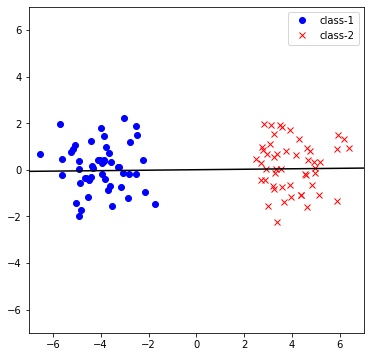

In [5]:
# データのクラスタが2つの場合
sample_size = 100
pattern = 'two_cluster'
x, y = generate_data(sample_size=sample_size, random_state=0, pattern=pattern)
T = fda(x, y)
print(T)
visualize(x, y, T, pattern)

[[-0.4061372  0.9986941]]


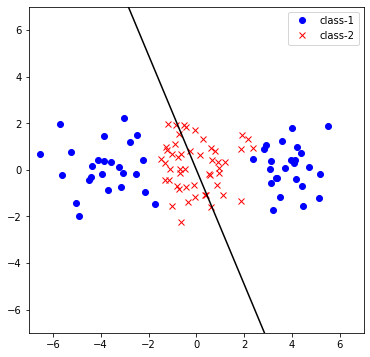

In [6]:
# データのクラスタが３つの場合
sample_size = 100
pattern = 'three_cluster'
x, y = generate_data(sample_size=sample_size,  random_state=0,  pattern='three_cluster')
T = fda(x, y)
print(T)
visualize(x, y, T, pattern)

データが2つのクラスタを持つような場合はクラスごとの差が大きくなるような射影曲線を求めることができている．  
データのクラスタが１クラスに2つ以上あるような場合は単純に同じクラスの全てのデータのクラス内分散を求めるのは適切でないため，うまく射影曲線が引けていない．  
このような場合は局所フィッシャー判別分析などの手法が有効である．  